Alonzo Murrieta, 3/20/23

# Prison Deaths in America: What can we learn?

<h2>Introduction</h2>

For the reader, what do you think of when you think of jail, or prison?
Do you think of justice, rehabilitation, punishment? 
The answer varies from person to person. 

Regardless of what you believe a prison in the United States is intended for, there exists a factor in prisons that it seems many gloss over; deaths.

What do we currently know about prison deaths? What can we learn from the data that has been generated on the topic, what can we learn from the silences in the data, and what can we learn from the missing data?
In this notebook, we will attempt to further the narrative on all of these questions.

While browsing potential datasets to use on this project, coming across Dying Inside, an investigattion into prison deaths by Reuters, made me question how prisons were impacted by COVID-19 and whether prisoners were dying to COVID-19 at a higher rate than the rest of the nation. Following this thought led to the creation of this project and the question, what do we currently know about prison deaths and what can we learn?

<h2>Methods</h2>

The dataset used in this project comes from the Reuters investigation Dying Inside. Dying Inside is a four part investigation that in short covers issues surrounding the existing issues with prison deaths and mainly the flaws in and lack of their documentation. The dataset used in this project consists of two main .csv files. The first file, “all_deaths.csv”, contains a list of documented prison deaths ranging from 2008-2019. In each column basic statistics such as prisoner name, cause of death, date of death, jail, and state are given. The second file, “all_jails.csv”, contains a list of jails and statistics regarding prisoner population and prisoner deaths by individual years ranging from 2008-2019. The datasets as well as the investigation can be found at https://www.reuters.com/investigates/special-report/usa-jails-graphic/. 

For this project, I attempted to find existing and noticeable outliers in prison death statistics across the country. The main form of data visualization used in this project is bar graphs, which are used in order to show the frequency of various statistics I honed in on, such as causes of death or the number of years a prison had an abnormally high homicide rate. The main goal of the project attempts to find the prisons and states in which categories such as homicides, suicides, illness deaths, and drug and alcohol related deaths were the leading causes of deaths. 


<h2>Results</h2>

In [1]:
import pandas as pd
import zipfile
import folium
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alonzoaam/dh140finalproject/main/all_deaths.csv', encoding='cp1252')
jails_df = pd.read_csv('https://raw.githubusercontent.com/alonzoaam/dh140finalproject/main/all_jails.csv', encoding='cp1252')

In [3]:
state_data = df.groupby('state')['state'].count()
state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
m = folium.Map(location=[36, -98], zoom_start=4)
folium.Choropleth(
    geo_data=state_geo,
    data=state_data,
    key_on="feature.id",
    fill_color="YlGn",
).add_to(m)
m

We can begin our discussion by observing a map of prison deaths in the United States. The darker shade of green a state has indicates a higher amount of prison deaths, with the level being shown in the top right. We can further our analysis by observing the three states with the most prison deaths; California, Texas, and Florida. Before we do so, we will first gather various statistics from our dataset in hopes of finding any outliers or notable patterns.

In [4]:
age_data = df.groupby('age')['age'].count()
topThreeAge_data = df.loc[df['state'] == ('LA' or 'TX' or 'FL')].groupby('age')['age'].count()
race_data = df.groupby('race')['race'].count()
topThreeRace_data = df.loc[df['state'] == ('LA' or 'TX' or 'FL')].groupby('race')['race'].count()
year_data = df.groupby('year')['year'].count()
topThreeYear_data = df.loc[df['state'] == ('LA' or 'TX' or 'FL')].groupby('year')['year'].count()
cause_data = df.groupby('cause_short')['cause_short'].count()
topThreeCause_data = df.loc[df['state'] == ('LA' or 'TX' or 'FL')].groupby('cause_short')['cause_short'].count()

Text(0.04, 0.5, 'Deaths')

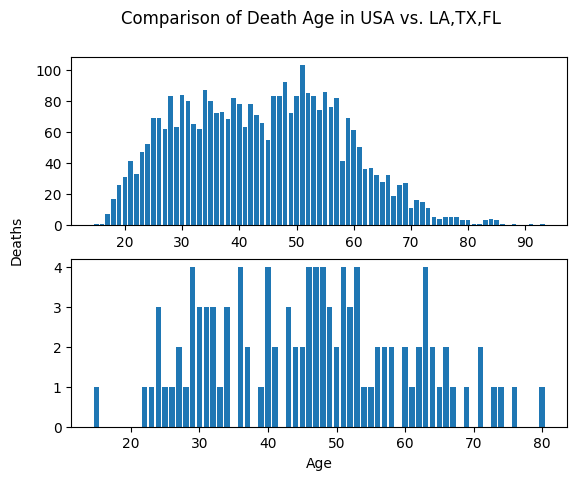

In [5]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Age in USA vs. LA,TX,FL')
ax1.bar(x=age_data.keys(),height=age_data)
ax2.bar(x=topThreeAge_data.keys(),height=topThreeAge_data)
ax2.set_xlabel('Age')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')

Text(0.04, 0.5, 'Deaths')

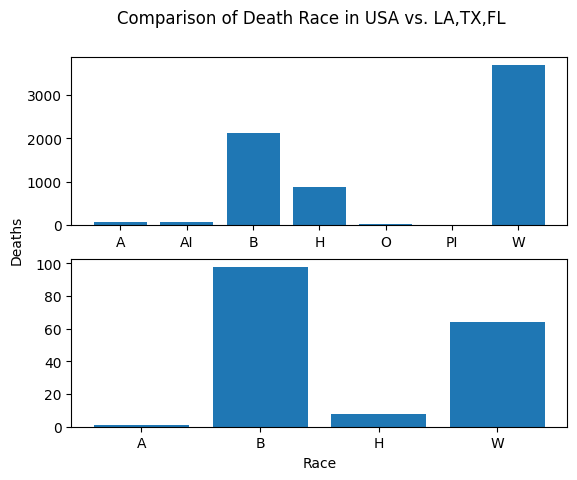

In [6]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Race in USA vs. LA,TX,FL')
ax1.bar(x=race_data.keys(),height=race_data)
ax2.bar(x=topThreeRace_data.keys(),height=topThreeRace_data)
ax2.set_xlabel('Race')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')

Text(0.04, 0.5, 'Deaths')

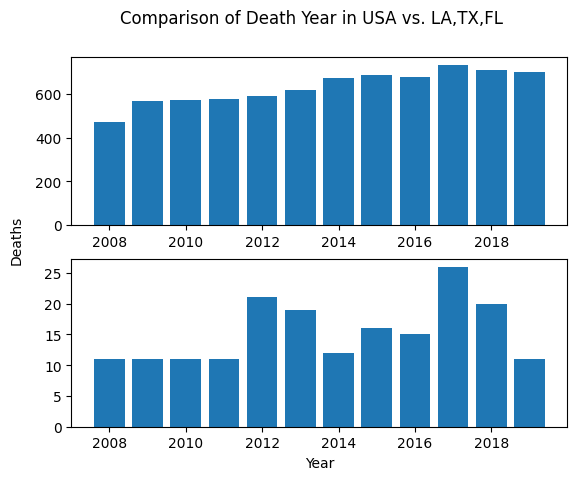

In [7]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Year in USA vs. LA,TX,FL')
ax1.bar(x=year_data.keys(),height=year_data)
ax2.bar(x=topThreeYear_data.keys(),height=topThreeYear_data)
ax2.set_xlabel('Year')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')

Text(0.5, -0.02, 'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other')

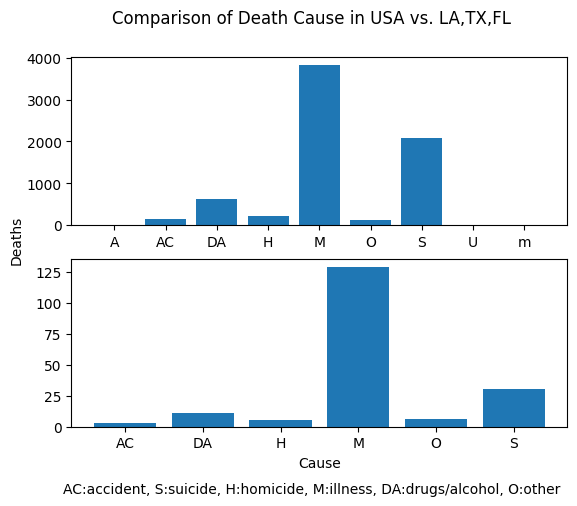

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Cause in USA vs. LA,TX,FL')
ax1.bar(x=cause_data.keys(),height=cause_data)
ax2.bar(x=topThreeCause_data.keys(),height=topThreeCause_data)
ax2.set_xlabel('Cause')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')
fig.text(.5,-.02,'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other',ha='center',va='center')

When comparing the death statistics from California, Texas, and Florida prisons to the entire Country, what can we learn?
For age, the trend of CA, TX, and FL prisons follows similarly to the United States.
For race, we can see that Black inmates die a disproportionately higher rate in CA, TX, and FL prisons than the entire country.
For year, there seems to be no interesting outlier.
For cause of death, we can see that the trends in CA, TX, and FL prisons follow those of the country.

Viewing prison death statistics at a state level offers only a few key points. To further our analysis, we can begin viewing outliers of prison deaths at the jail level.

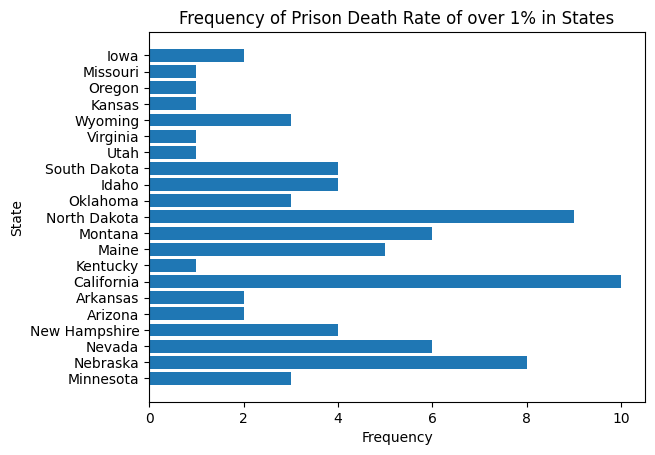

Text(0, 0.5, 'Jail')

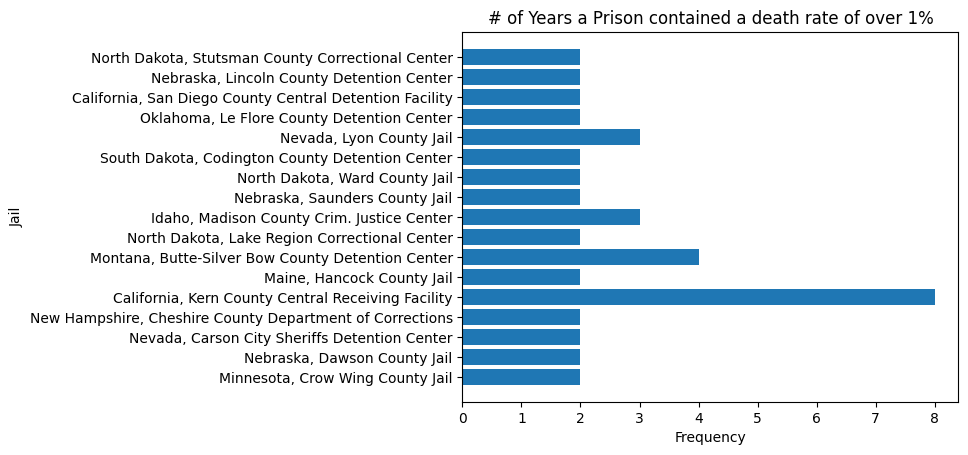

In [9]:
tP2019 = jails_df.loc[(jails_df['d2019']/jails_df['adp2019']) > .01]
tP2018 = jails_df.loc[(jails_df['d2018']/jails_df['adp2018']) > .01]
tP2017 = jails_df.loc[(jails_df['d2017']/jails_df['adp2017']) > .01]
tP2016 = jails_df.loc[(jails_df['d2016']/jails_df['adp2016']) > .01]
tP2015 = jails_df.loc[(jails_df['d2015']/jails_df['adp2015']) > .01]
tP2014 = jails_df.loc[(jails_df['d2014']/jails_df['adp2014']) > .01]
tP2013 = jails_df.loc[(jails_df['d2013']/jails_df['adp2013']) > .01]
tP2012 = jails_df.loc[(jails_df['d2012']/jails_df['adp2012']) > .01]
tP2011 = jails_df.loc[(jails_df['d2011']/jails_df['adp2011']) > .01]
tP2010 = jails_df.loc[(jails_df['d2010']/jails_df['adp2010']) > .01]
tP2009 = jails_df.loc[(jails_df['d2009']/jails_df['adp2009']) > .01]
tP2008 = jails_df.loc[(jails_df['d2008']/jails_df['adp2008']) > .01]
tPD = [tP2019,tP2018,tP2017,tP2016,tP2015,tP2014,tP2013,tP2012,tP2011,tP2010,tP2009,tP2008]
stateDict = {}
jailDict = {}
for t in tPD:
  for s in t[['state','jail']].values:
    if s[0] in stateDict.keys():
      stateDict[s[0]] += 1
    else:
      stateDict[s[0]] = 1
    if (s[0],s[1]) in jailDict.keys():
      jailDict[(s[0],s[1])] += 1
    else:
      jailDict[(s[0],s[1])] = 1
plt.barh(y=list(stateDict.keys()),width=list(stateDict.values()))
plt.title('Frequency of Prison Death Rate of over 1% in States')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()
topJails = {k:v for (k,v) in jailDict.items() if v > 1}
y = []
topJailNames = []
for i in list(topJails.keys()):
  y.append(i[0] + ", " + i[1])
  topJailNames.append(i[1])
plt.barh(y=y,width=list(topJails.values()))
plt.title('# of Years a Prison contained a death rate of over 1%')
plt.xlabel('Frequency')
plt.ylabel('Jail')

The two bar graphs above show us two similar statistics; the number of years in which a state contained a prison with a prison inmate death percentage of over 1%, and below the prisons containing more than one occurrence of a death rate of over 1%.

In the first graph, we can see that North Dakota and California contain the highest frequency of times where a prison contained a death rate of over 1%. 

In the second graph, we can see that a fair number of prisons have had multiple years in which the inmate death percentage was over 1%. Let's see if we can begin further analysis on these prisons.

Text(0.5, -0.02, 'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other')

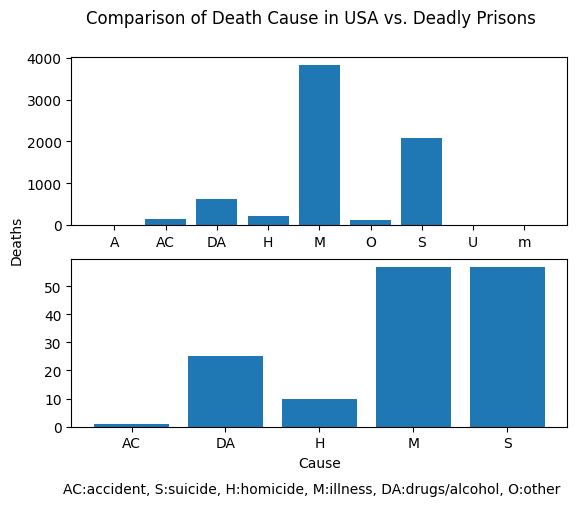

In [11]:
topJailCauses = df.loc[df['jail'].isin(topJailNames)].groupby('cause_short')['cause_short'].count()
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Cause in USA vs. Deadly Prisons')
ax1.bar(x=cause_data.keys(),height=cause_data)
ax2.bar(x=topJailCauses.keys(),height=topJailCauses)
ax2.set_xlabel('Cause')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')
fig.text(.5,-.02,'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other',ha='center',va='center')

The results of the bar graph above show us an interesting finding. When revisiting our graph of causes of death in the United States, we can see that suicide and illness are proportionately equal in prisons with a death percentage of over 1%.

Let's now examine this relation for all deaths that occurred in prisons with a deathrate of over 1% for the year in which they occurred.

Text(0.5, -0.02, 'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other')

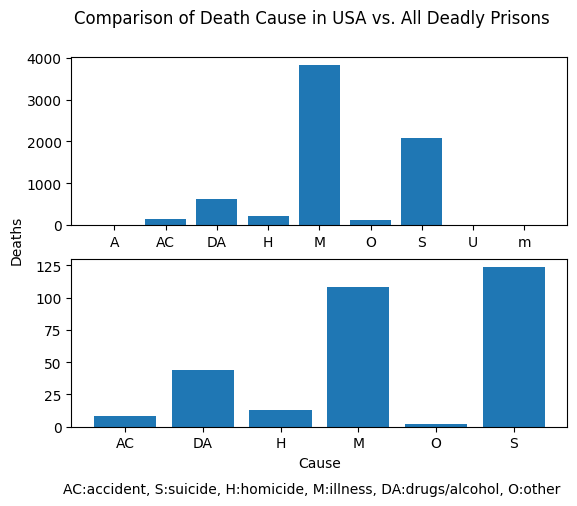

In [12]:
yAll = []
allDeadlyJailNames = []
for i in list(jailDict.keys()):
  allDeadlyJailNames.append(i[1])
allTopJailCauses = df.loc[df['jail'].isin(allDeadlyJailNames)].groupby('cause_short')['cause_short'].count()
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Comparison of Death Cause in USA vs. All Deadly Prisons')
ax1.bar(x=cause_data.keys(),height=cause_data)
ax2.bar(x=allTopJailCauses.keys(),height=allTopJailCauses)
ax2.set_xlabel('Cause')
fig.text(0.04,0.5,'Deaths', ha='center', va='center', rotation='vertical')
fig.text(.5,-.02,'AC:accident, S:suicide, H:homicide, M:illness, DA:drugs/alcohol, O:other',ha='center',va='center')

When viewing all deaths that occurred in prisons the same year the prison had a death rate of over 1%, we can see that suicide is the leading cause of death in these situations.

From our findings, it seems that prisons with a higher death percentage have proportionately higher suicide rates. 

Following this result, we can attempt to find the states and prisons containing abnormally higher homicide rates, drug/alcohol deaths, and illnesses.

In [25]:
daP2019 = jails_df.loc[((jails_df['da2019']/jails_df['d2019']) > .5) & (jails_df['d2019'] > 1)]
daP2018 = jails_df.loc[((jails_df['da2018']/jails_df['d2018']) > .5) & (jails_df['d2018'] > 1)]
daP2017 = jails_df.loc[((jails_df['da2017']/jails_df['d2017']) > .5) & (jails_df['d2017'] > 1)]
daP2016 = jails_df.loc[((jails_df['da2016']/jails_df['d2016']) > .5) & (jails_df['d2016'] > 1)]
daP2015 = jails_df.loc[((jails_df['da2015']/jails_df['d2015']) > .5) & (jails_df['d2015'] > 1)]
daP2014 = jails_df.loc[((jails_df['da2014']/jails_df['d2014']) > .5) & (jails_df['d2014'] > 1)]
daP2013 = jails_df.loc[((jails_df['da2013']/jails_df['d2013']) > .5) & (jails_df['d2013'] > 1)]
daP2012 = jails_df.loc[((jails_df['da2012']/jails_df['d2012']) > .5) & (jails_df['d2012'] > 1)]
daP2011 = jails_df.loc[((jails_df['da2011']/jails_df['d2011']) > .5) & (jails_df['d2011'] > 1)]
daP2010 = jails_df.loc[((jails_df['da2010']/jails_df['d2010']) > .5) & (jails_df['d2010'] > 1)]
daP2009 = jails_df.loc[((jails_df['da2009']/jails_df['d2009']) > .5) & (jails_df['d2009'] > 1)]
daP2008 = jails_df.loc[((jails_df['da2008']/jails_df['d2008']) > .5) & (jails_df['d2008'] > 1)]
daPD = [daP2019,daP2018,daP2017,daP2016,daP2015,daP2014,daP2013,daP2012,daP2011,daP2010,daP2009,daP2008]
#print(daPD)

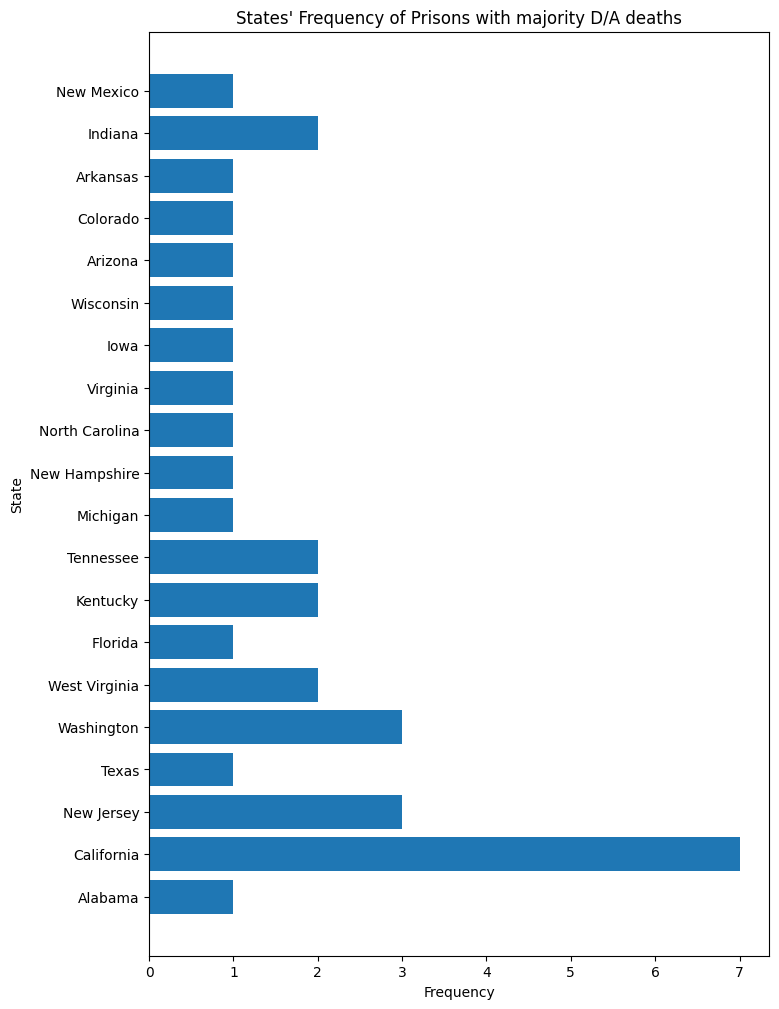

Text(0, 0.5, 'Jail')

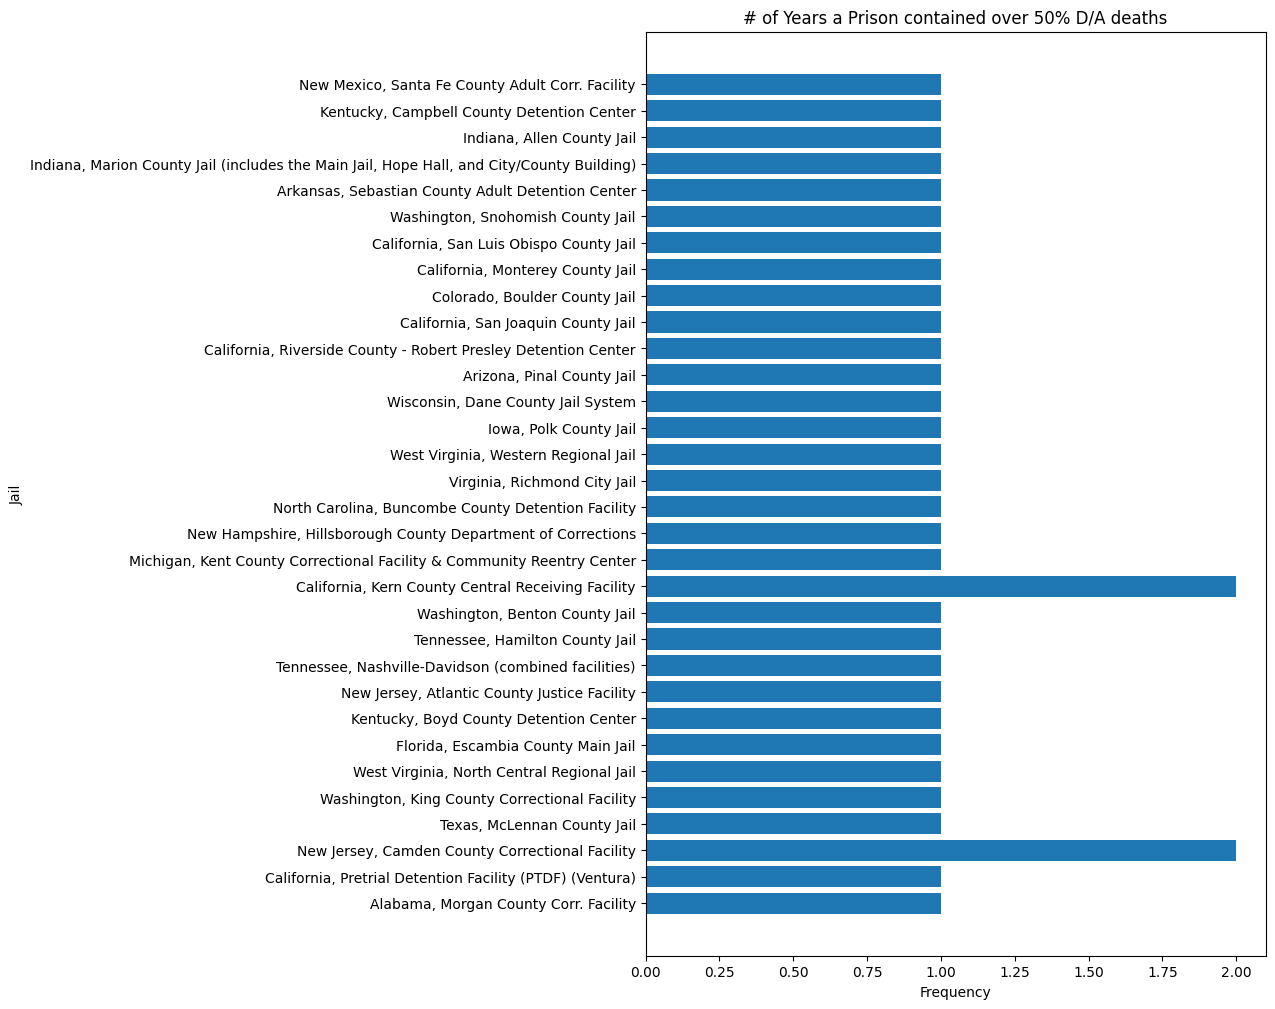

In [43]:
stateDictDA = {}
jailDictDA = {}
for da in daPD:
    for s in da[['state','jail']].values:
        if s[0] in stateDictDA.keys():
          stateDictDA[s[0]] += 1
        else:
          stateDictDA[s[0]] = 1
        if (s[0],s[1]) in jailDictDA.keys():
          jailDictDA[(s[0],s[1])] += 1
        else:
          jailDictDA[(s[0],s[1])] = 1
plt.figure(figsize=(8,12))
plt.barh(y=list(stateDictDA.keys()),width=list(stateDictDA.values()))
plt.title('States\' Frequency of Prisons with majority D/A deaths')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()
yDA = []
for i in list(jailDictDA.keys()):
  yDA.append(i[0] + ", " + i[1])
plt.figure(figsize=(8,12))
plt.barh(y=yDA,width=list(jailDictDA.values()))
plt.title('# of Years a Prison contained over 50% D/A deaths')
plt.xlabel('Frequency')
plt.ylabel('Jail')


The graph above shows the number of times a state contained a prison such that the prison had a year from 2008-2019 where more than 50% of it's deaths were drug/alcohol related and had more than 1 death. From our findings we can note that prisons within California, Washington, and New Jersey are likely to have higher rates of drug/alcohol related deaths.



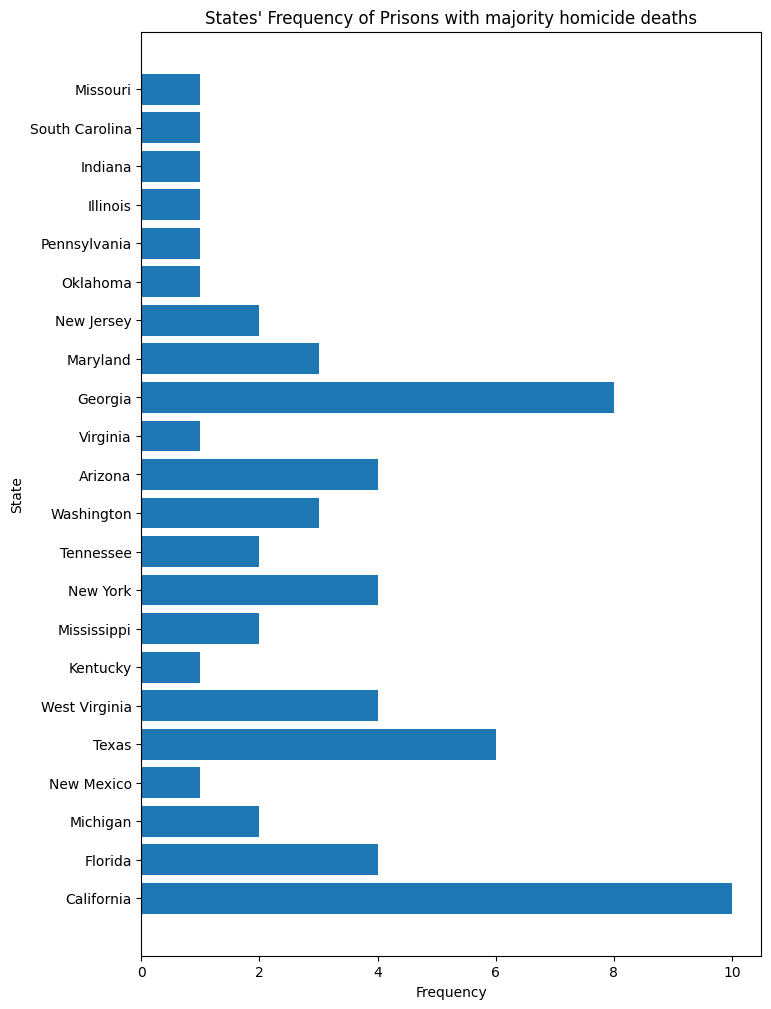

Text(0, 0.5, 'Jail')

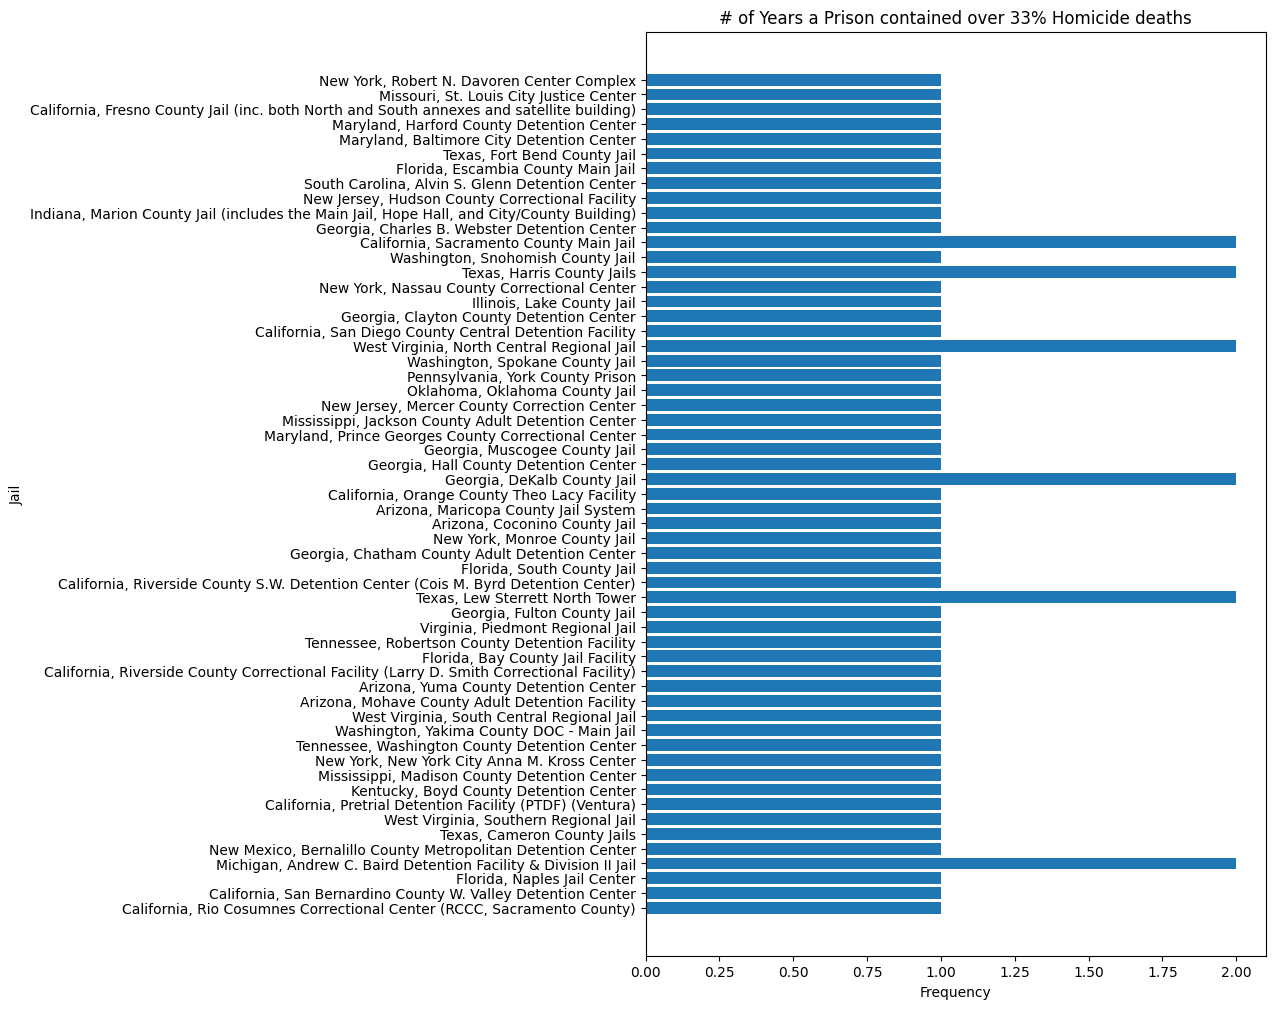

In [44]:
hoP2019 = jails_df.loc[((jails_df['ho2019']/jails_df['d2019']) > .33) & (jails_df['d2019'] > 1)]
hoP2018 = jails_df.loc[((jails_df['ho2018']/jails_df['d2018']) > .33) & (jails_df['d2018'] > 1)]
hoP2017 = jails_df.loc[((jails_df['ho2017']/jails_df['d2017']) > .33) & (jails_df['d2017'] > 1)]
hoP2016 = jails_df.loc[((jails_df['ho2016']/jails_df['d2016']) > .33) & (jails_df['d2016'] > 1)]
hoP2015 = jails_df.loc[((jails_df['ho2015']/jails_df['d2015']) > .33) & (jails_df['d2015'] > 1)]
hoP2014 = jails_df.loc[((jails_df['ho2014']/jails_df['d2014']) > .33) & (jails_df['d2014'] > 1)]
hoP2013 = jails_df.loc[((jails_df['ho2013']/jails_df['d2013']) > .33) & (jails_df['d2013'] > 1)]
hoP2012 = jails_df.loc[((jails_df['ho2012']/jails_df['d2012']) > .33) & (jails_df['d2012'] > 1)]
hoP2011 = jails_df.loc[((jails_df['ho2011']/jails_df['d2011']) > .33) & (jails_df['d2011'] > 1)]
hoP2010 = jails_df.loc[((jails_df['ho2010']/jails_df['d2010']) > .33) & (jails_df['d2010'] > 1)]
hoP2009 = jails_df.loc[((jails_df['ho2009']/jails_df['d2009']) > .33) & (jails_df['d2009'] > 1)]
hoP2008 = jails_df.loc[((jails_df['ho2008']/jails_df['d2008']) > .33) & (jails_df['d2008'] > 1)]
hoPD = [hoP2019,hoP2018,hoP2017,hoP2016,hoP2015,hoP2014,hoP2013,hoP2012,hoP2011,hoP2010,hoP2009,hoP2008]
stateDictHO = {}
jailDictHO = {}
for ho in hoPD:
    for s in ho[['state','jail']].values:
        if s[0] in stateDictHO.keys():
          stateDictHO[s[0]] += 1
        else:
          stateDictHO[s[0]] = 1
        if (s[0],s[1]) in jailDictHO.keys():
          jailDictHO[(s[0],s[1])] += 1
        else:
          jailDictHO[(s[0],s[1])] = 1
plt.figure(figsize=(8,12))
plt.barh(y=list(stateDictHO.keys()),width=list(stateDictHO.values()))
plt.title('States\' Frequency of Prisons with majority homicide deaths')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()
yHO = []
for i in list(jailDictHO.keys()):
  yHO.append(i[0] + ", " + i[1])
plt.figure(figsize=(8,12))
plt.barh(y=yHO,width=list(jailDictHO.values()))
plt.title('# of Years a Prison contained over 33% Homicide deaths')
plt.xlabel('Frequency')
plt.ylabel('Jail')

This time, we observe a similar chart that provides the number of times a state contained a prison such that the prison had a year from 2008-2019 where homicides made up over 33% of total deaths. We can see that California, Georgia, and Texas contain prisons that are more likely to have higher rates of homicide. 

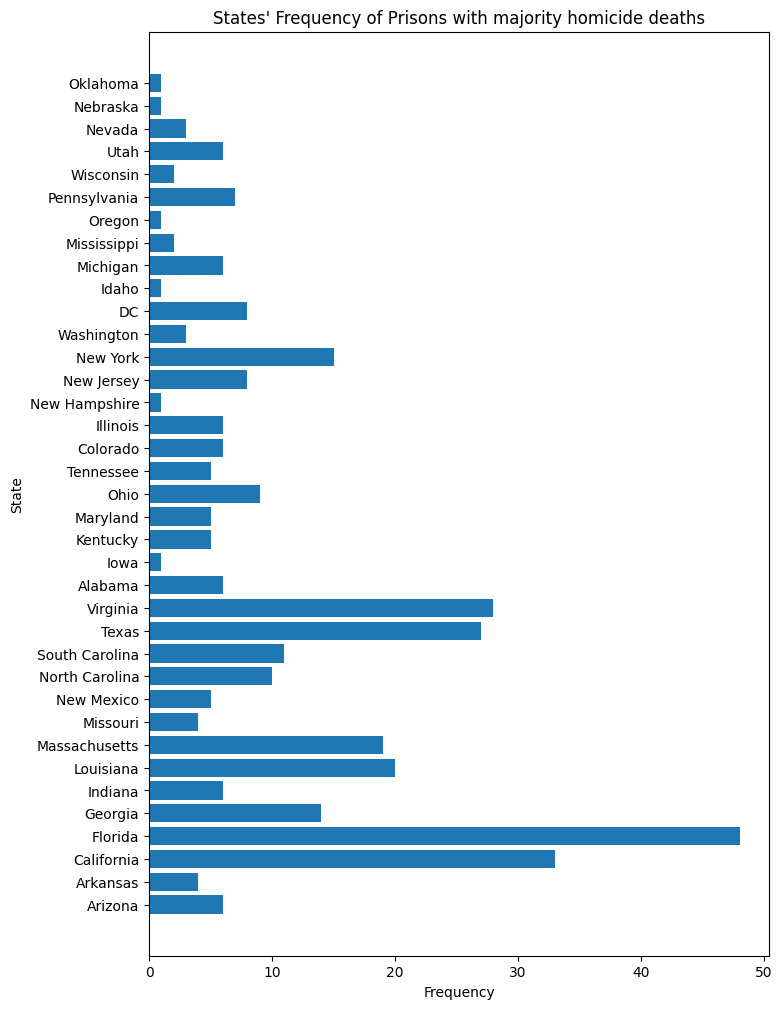

{2, 3, 4, 5, 6, 8}


Text(0, 0.5, 'Jail')

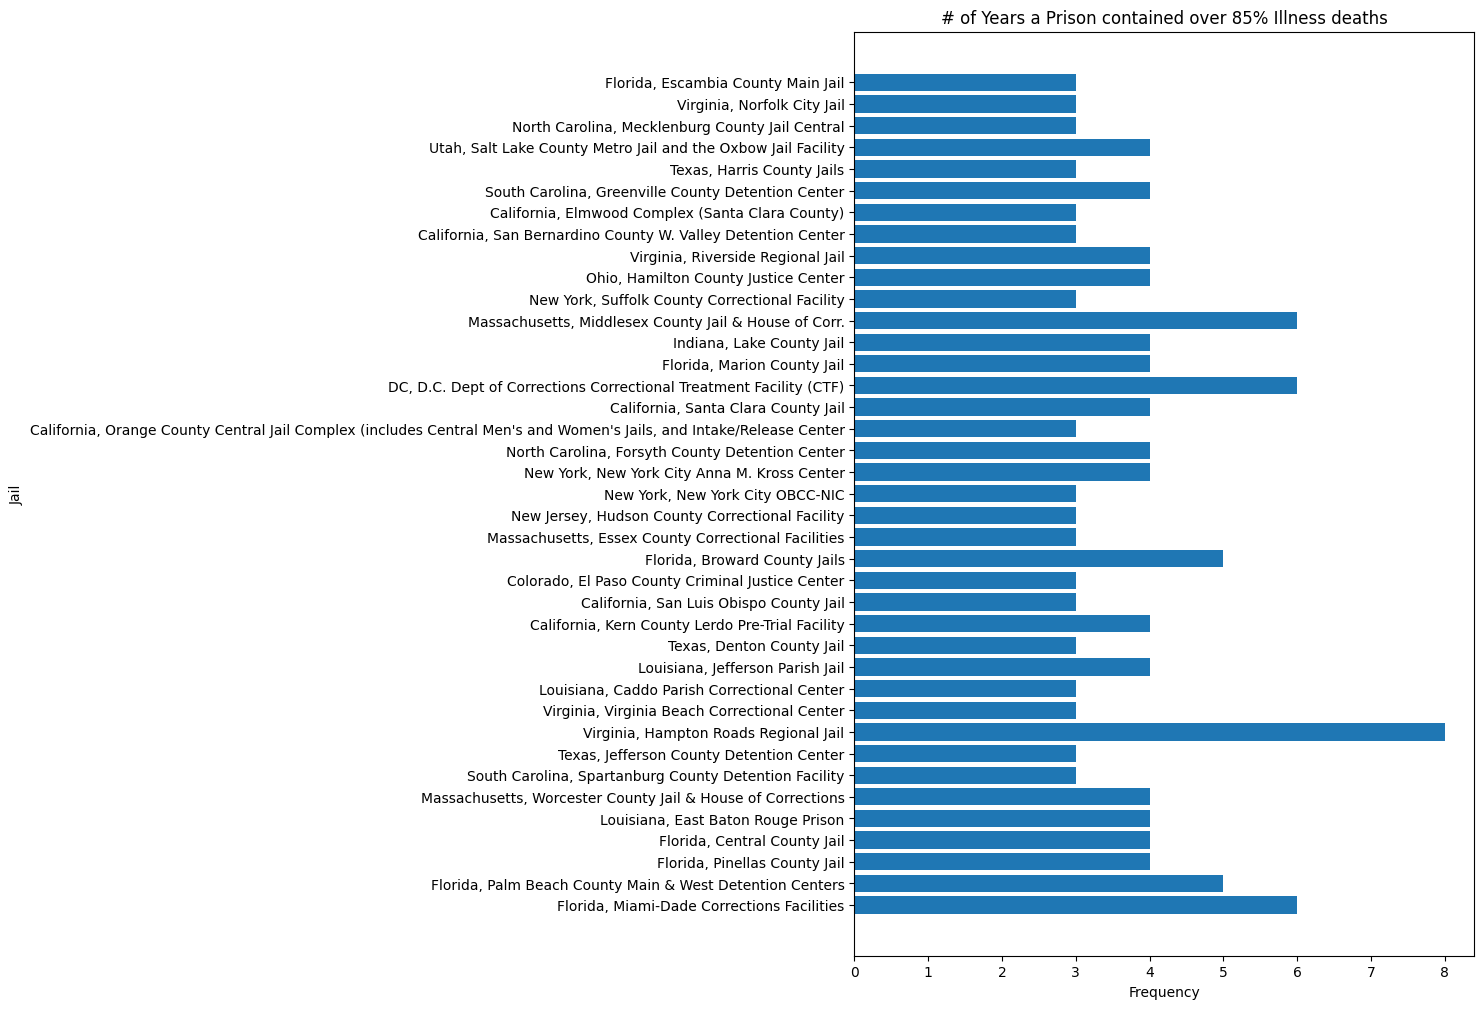

In [55]:
ilP2019 = jails_df.loc[((jails_df['il2019']/jails_df['d2019']) > .85) & (jails_df['d2019'] > 1)]
ilP2018 = jails_df.loc[((jails_df['il2018']/jails_df['d2018']) > .85) & (jails_df['d2018'] > 1)]
ilP2017 = jails_df.loc[((jails_df['il2017']/jails_df['d2017']) > .85) & (jails_df['d2017'] > 1)]
ilP2016 = jails_df.loc[((jails_df['il2016']/jails_df['d2016']) > .85) & (jails_df['d2016'] > 1)]
ilP2015 = jails_df.loc[((jails_df['il2015']/jails_df['d2015']) > .85) & (jails_df['d2015'] > 1)]
ilP2014 = jails_df.loc[((jails_df['il2014']/jails_df['d2014']) > .85) & (jails_df['d2014'] > 1)]
ilP2013 = jails_df.loc[((jails_df['il2013']/jails_df['d2013']) > .85) & (jails_df['d2013'] > 1)]
ilP2012 = jails_df.loc[((jails_df['il2012']/jails_df['d2012']) > .85) & (jails_df['d2012'] > 1)]
ilP2011 = jails_df.loc[((jails_df['il2011']/jails_df['d2011']) > .85) & (jails_df['d2011'] > 1)]
ilP2010 = jails_df.loc[((jails_df['il2010']/jails_df['d2010']) > .85) & (jails_df['d2010'] > 1)]
ilP2009 = jails_df.loc[((jails_df['il2009']/jails_df['d2009']) > .85) & (jails_df['d2009'] > 1)]
ilP2008 = jails_df.loc[((jails_df['il2008']/jails_df['d2008']) > .85) & (jails_df['d2008'] > 1)]
ilPD = [ilP2019,ilP2018,ilP2017,ilP2016,ilP2015,ilP2014,ilP2013,ilP2012,ilP2011,ilP2010,ilP2009,ilP2008]
stateDictIL = {}
jailDictIL = {}
for il in ilPD:
    for s in il[['state','jail']].values:
        if s[0] in stateDictIL.keys():
          stateDictIL[s[0]] += 1
        else:
          stateDictIL[s[0]] = 1
        if (s[0],s[1]) in jailDictIL.keys():
          jailDictIL[(s[0],s[1])] += 1
        else:
          jailDictIL[(s[0],s[1])] = 1
plt.figure(figsize=(8,12))
plt.barh(y=list(stateDictIL.keys()),width=list(stateDictIL.values()))
plt.title('States\' Frequency of Prisons with majority homicide deaths')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()
yIL = []
xIL = []
for i in list(jailDictIL.keys()):
    if jailDictIL[i] > 2:
        yIL.append(i[0] + ", " + i[1])
        xIL.append(jailDictIL[i])
print(frequentIL)
plt.figure(figsize=(8,12))
plt.barh(y=yIL,width=xIL)
plt.title('# of Years a Prison contained over 85% Illness deaths')
plt.xlabel('Frequency')
plt.ylabel('Jail')

This time, we observe a similar bar chart but with a new criteria of illness deaths being atleast 85% of a prison's deaths.

While we cannot definitively say anything about the individual states, it appears that across the country there exist prisons where illness is the leading and high majority cause of death. 

From this, we can start a discussion on the conditions that these prisons may be in. 

<h2>Discussion</h2>

What did we learn?

1. California, Texas, and Florida have the most occurrences of documented prison deaths.
  * However, this is not entirely surprising due to the fact that these three states have some of the highest populations in the country.
2. In California, Texas, and Florida, Black prisoners die at a disproportionately higher rate when compared to the entire country.
3. California, North Dakota, Nebraska, Montana, and Nevada have the highest frequency of prisons having a year where the death rate was over 1% of the inmate population.
  * Kern County Central Receiving Facility in California has had 8 years from 2008-2019 where there was a prison inmate death rate of over 1%.
4. For all deaths that occurred in a prison in the year the prison had over a 1% death rate, suicide seems to be the leading cause of death.
5. California, Washington, and New Jersey have the highest frequency of prisons having a year in which over half over inmate deaths were due to drug and alcohol related deaths.
  * Kern County Central Receiving Facility in California and Camden Correctional Facility in New Jersey have had 2 years where drug and alcohol deaths made up over half of prison inmate deaths.
6. California, Georgia, Texas, Arizona, New York, West Virginia, and Florida have the highest frequency of prisons having a year in which over 33% over inmate deaths were due homicides.
  * Sacramento County Main Jail, Harris County Jails, North Central Regional Jail, DeKalb County Jail, Lew Sterrett North Tower, and Andrew C. Baird Detention Facility & Division II Jail have all had two years in which homicides made up over 33% of prisoner deaths.
7. Florida, California, Virginia, Texas, Louisiana, and Massachusetts have the highest frequency of prisons having a year in which over 85% of inmate deaths were due to homicides.
  * Hampton Roads Regional Jail, Middlesex County Jail & House of Correction, D.C Dept of Corrections Correctional Treatment Facility, and Miami-Dade Corrections Facilities have all had at least 6 years from 2008-2019 in which over 85% of inmate deaths were due to illness.

Knowing these findings, how can we proceed? The plain answer is to continue the conversation. Unfortunately, it is out of my scope and range to tackle all of the questions surrounding the discussion around prison deaths. This project was started to begin exposure of the narrative around prison deaths by giving some observable statistics. I felt that for one, the topic surrounding prison deaths as well as the main causes of deaths inside jails is a conversation that has not been widely discussed in any form of media. 

I offer these statistics to help you, the reader, to give notice of the lives of the many people being lost inside the United States Prison System. I do not offer the names of jails with high death rates for the reader to make note of them to avoid; but instead to realize that these institutions exist and are institutions anyone can fall into. Why are suicides so prominent in specific jails? Why are high homicide rates specific to only a few jails? Why has Hampton Roads Regional Jail had 8 specific years where over 85% of inmate deaths were due to illness? There may be answers as to why certain jails have abnormally high death rates, but if not due to a low inmate population, is any answer justifiable? Perhaps when we are able to realize that jails across the nation can be either well-kept correctional facilities with a direct purpose of rehabilitation or a jail that propels a majority of prisoners to commit suicide will we be able to tackle policy. 

I end this discussion with a statement, the Reuters data used in this project is perhaps the most reliable source of prison death data there is out there. Due to the fact that the government is able to withhold these statistics, we must realize that until these issues are widely discussed, we have no true scope of how large these problems are.
